# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [142]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

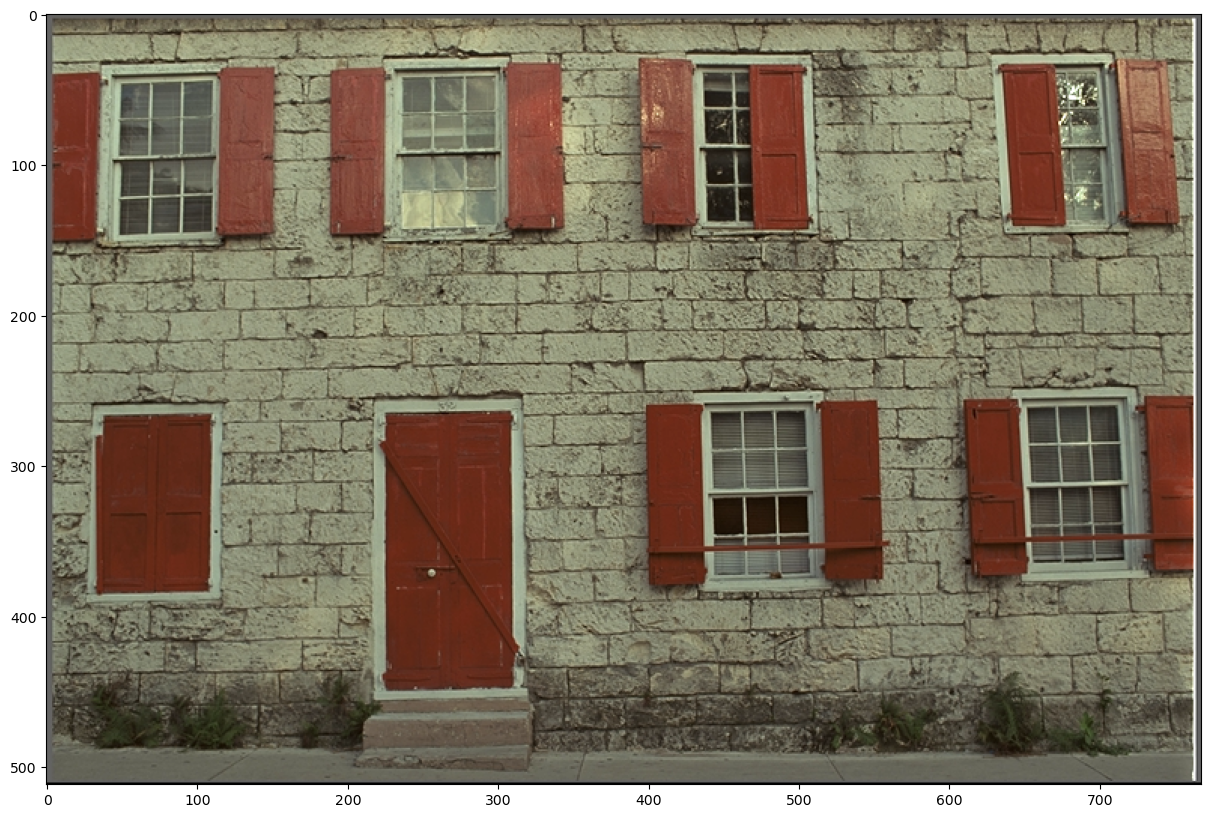

In [143]:
img = cv2.imread('data/kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

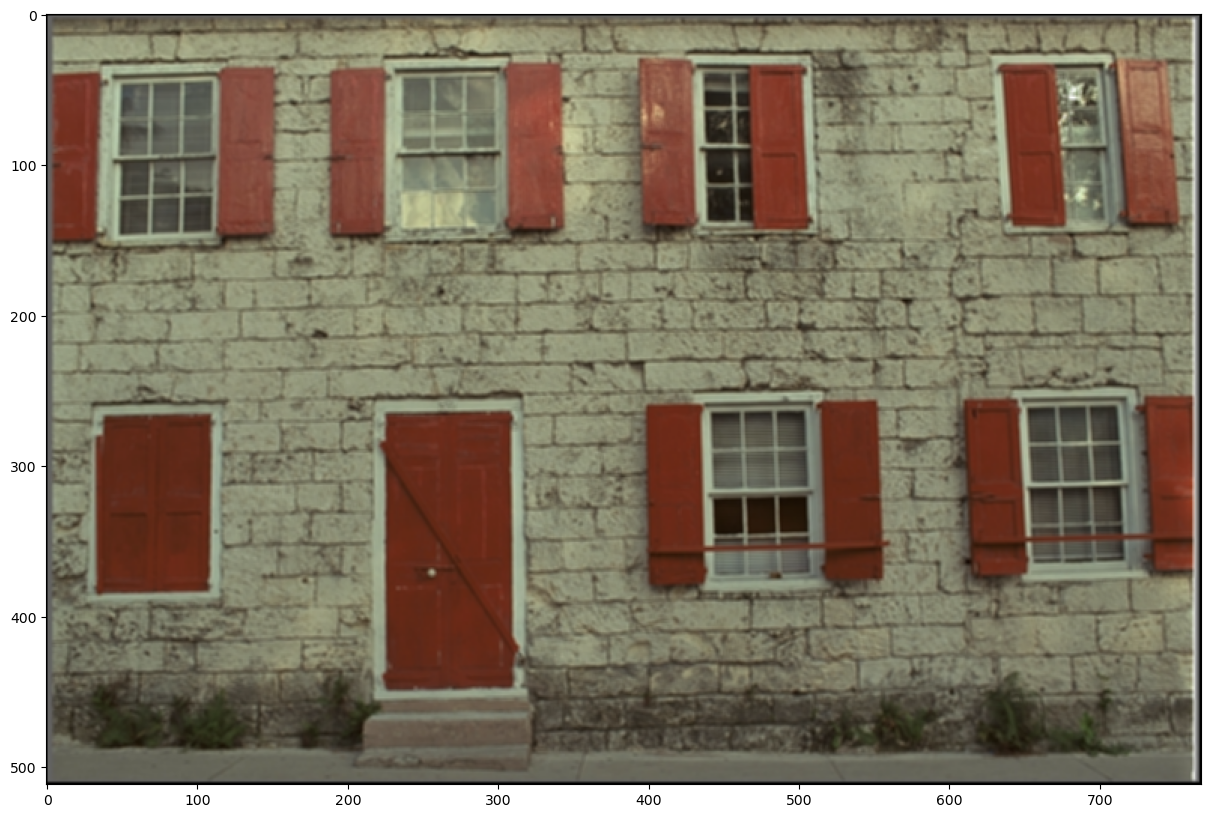

In [144]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9
rows, cols, channels = img.shape
unsharp_manual = np.zeros_like(img)

for r in range(1, rows - 1):
    for c in range(1, cols - 1):
        for ch in range(0, channels):
            block = img[r-1:r+2, c-1:c+2, ch]
            unsharp_manual[r, c, ch] = np.sum(block * kernel)
            
plt.imshow(unsharp_manual)

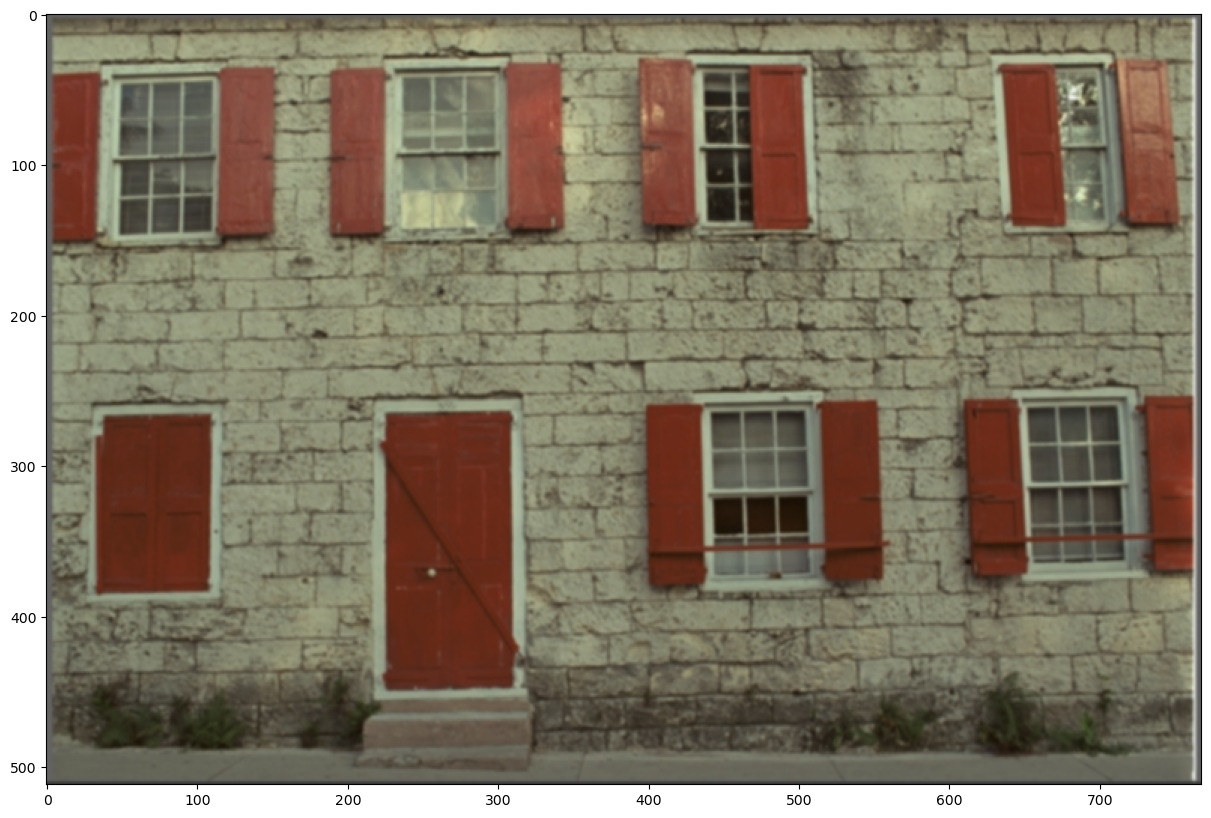

In [161]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(3,3), sigmaX=0.4)
plt.imshow(unsharp1)

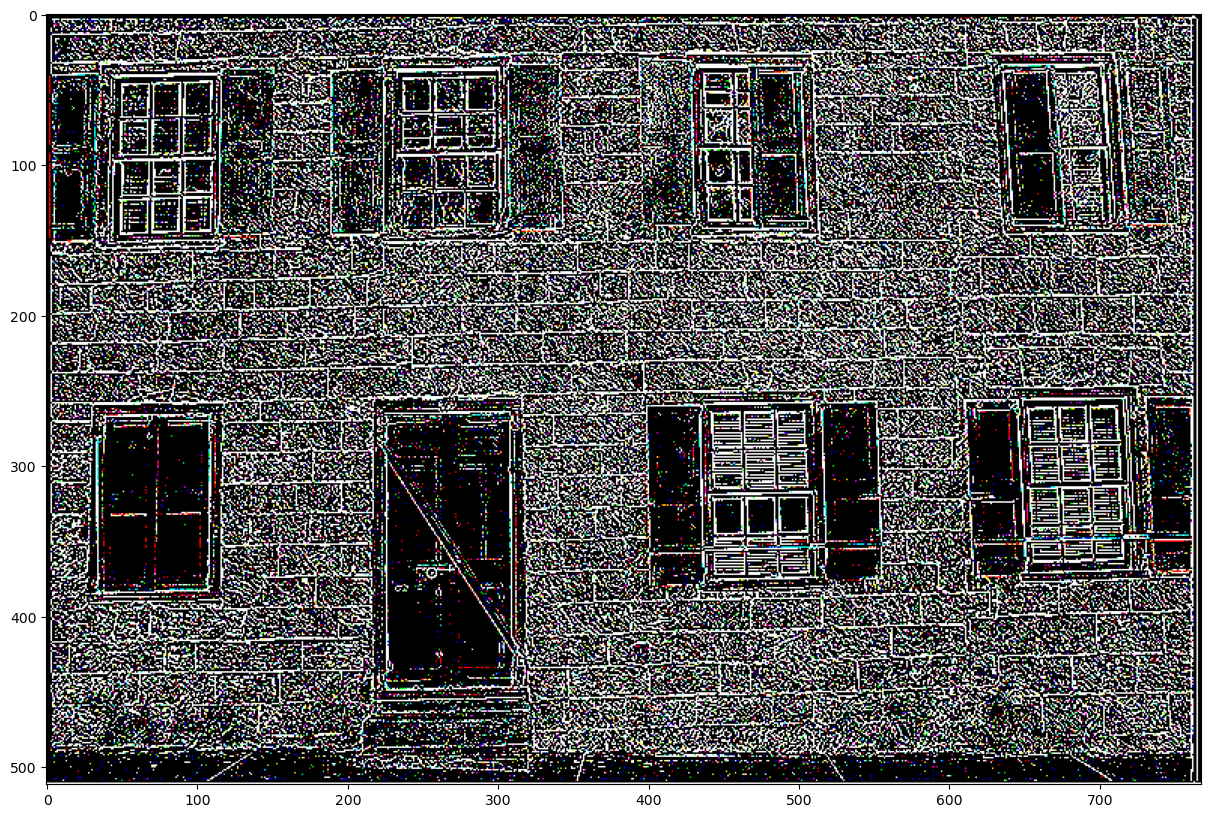

In [162]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = (img - unsharp)
plt.imshow(diff)

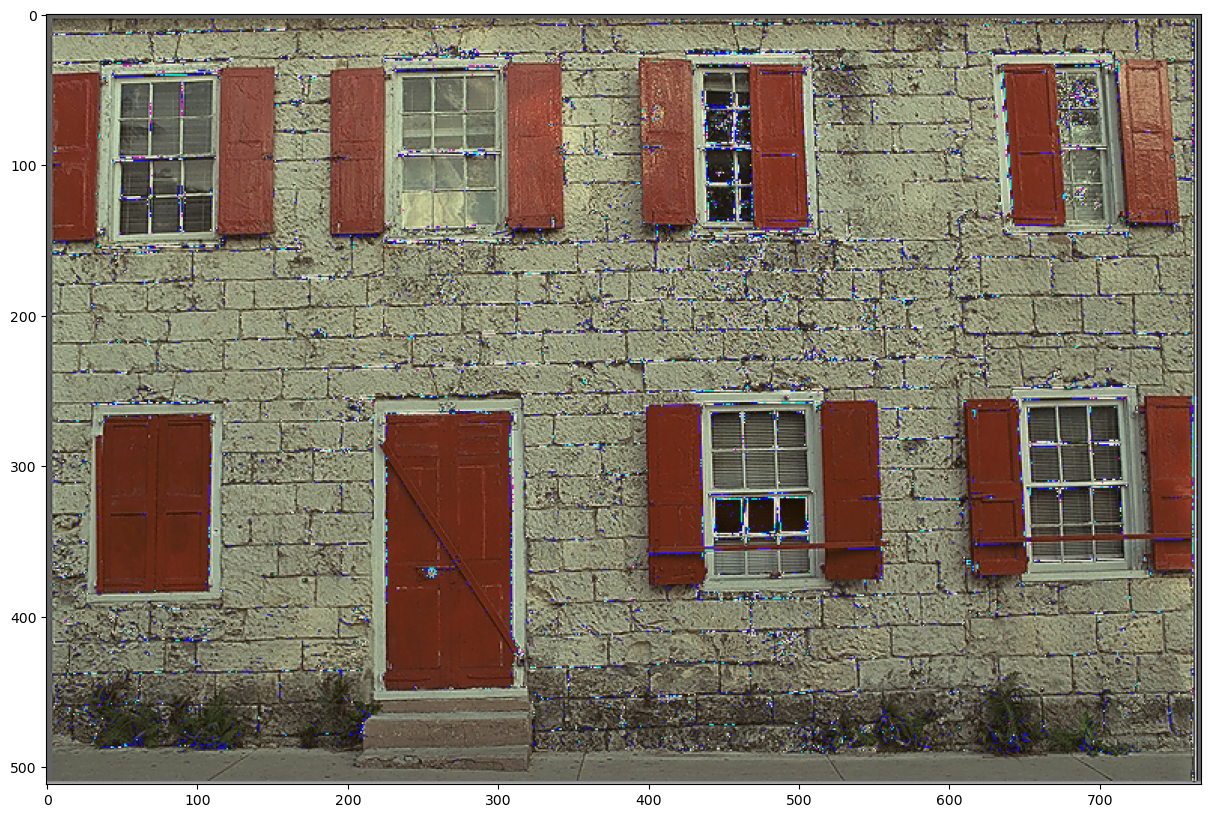

In [167]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
sharpened = (img + diff*(10)).astype(np.uint8)

plt.imshow(sharpened)

### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * What happens if it is too small?
 * What happens if it is too large?